In [1]:
DATA_DIR = "./mydataset"

Files already downloaded and verified
Files already downloaded and verified


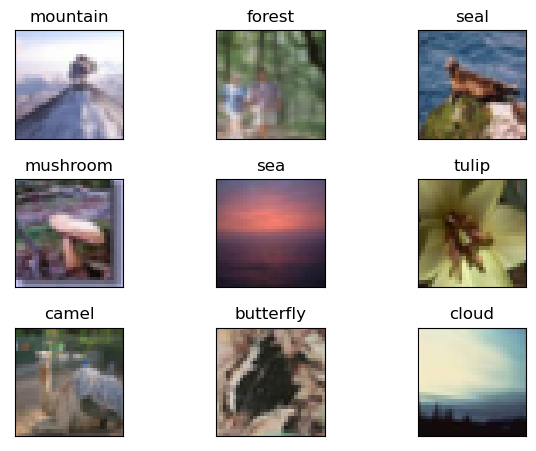

In [2]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import argparse

import numpy as np
import torch
from torchvision.datasets import cifar
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt


classes = (
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle",
    "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle",
    "caterpillar", "cattle", "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch",
    "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox",
    "girl", "hamster", "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion",
    "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse", "mushroom",
    "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road",
    "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake",
    "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone",
    "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale",
    "willow_tree", "wolf", "woman", "worm"
)


transforms_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Resize(32, interpolation=transforms.InterpolationMode.BICUBIC)
])

transforms_test = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Resize(32, interpolation=transforms.InterpolationMode.BICUBIC)
])

trainData = cifar.CIFAR100(DATA_DIR, train=True, transform=transforms_train, download=True)
testData = cifar.CIFAR100(DATA_DIR, train=False, transform=transforms_test, download=True)


train_size = int(0.9 * len(trainData))
valid_size = len(trainData) - train_size
trainData, validData = torch.utils.data.random_split(trainData, [train_size, valid_size])

x=0
for images, labels in testData:
    plt.subplot(3,3,x+1)
    plt.tight_layout()
    images = images.numpy().transpose(1, 2, 0)
    plt.title(str(classes[labels]))
    plt.imshow(images)
    plt.xticks([])
    plt.yticks([])
    x+=1
    if x==9:
        break
plt.show()

In [3]:
len(trainData), len(validData), len(testData)

(45000, 5000, 10000)

In [4]:
train_dl = DataLoader(trainData, shuffle=True, batch_size=256)
valid_dl = DataLoader(validData, shuffle=True, batch_size=256)
test_dl = DataLoader(testData, shuffle=True, batch_size=256)

In [5]:
for x, y in train_dl:
    break
x.shape, y.shape

(torch.Size([256, 3, 32, 32]), torch.Size([256]))

In [6]:
for x, y in valid_dl:
    break
x.shape, y.shape

(torch.Size([256, 3, 32, 32]), torch.Size([256]))

In [7]:
for x, y in test_dl:
    break
x.shape, y.shape

(torch.Size([256, 3, 32, 32]), torch.Size([256]))